# Assignment 

Importing Libraries

In [1]:
import random 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

Uploading Data

In [2]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


Cleaning Data

In [20]:
cust_df = cust_df.drop('Address', axis = 1)
cust_df.dropna(inplace=True)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [21]:
cust_df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [22]:
cust_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [23]:
X = cust_df[['Age', 'Edu', 'Years Employed', 'Income','Card Debt', 'Other Debt', 'DebtIncomeRatio']].values
X[0:5]

array([[4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01, 1.073e+00,
        6.300e+00],
       [4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00, 8.218e+00,
        1.280e+01],
       [3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00, 5.802e+00,
        2.090e+01],
       [2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01, 5.160e-01,
        6.300e+00],
       [4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00, 8.908e+00,
        7.200e+00]])

In [24]:
y = cust_df[['Defaulted']].values
y[0:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

Standardizing values

In [25]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.76830405,  0.29879269, -0.35900652, -0.72310225, -0.67569934,
        -0.60428433, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891,  1.47870741,  1.43142147,
         1.5706204 ,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057,  0.30984549,  2.15411948,
         0.83520125,  1.55949495],
       [-0.73326739,  0.29879269, -0.65961006, -0.72310225, -0.41242741,
        -0.77383254, -0.58052847],
       [ 1.51908977, -0.77932527,  3.39853777,  5.6376812 ,  3.66521532,
         1.78065319, -0.44860921]])

Split Data into Training and Testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (560, 7) (560, 1)
Test set: (140, 7) (140, 1)


<h2>Classifications Testing on the Data</h2>

In the following cells, 4 different classification algorithms/methods are utilized for the above data
In sequence these are 

1-K-Nearest Classification

2-Decision Tree

3-Support Vector Machine

4-Logistic Regression

## 1- K-Nearest Classification

Importing classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Applying thte KNN classifier for upto 10 Ks

In [29]:
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversion

array([0.74285714, 0.77857143, 0.75      , 0.76428571, 0.79285714,
       0.79285714, 0.78571429, 0.80714286, 0.8       ])

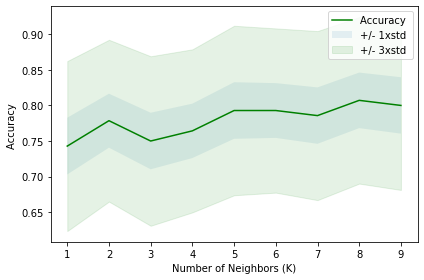

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

According to the above graph, K = 8 is the best result

Lets again run the algorithm for just k=8

In [71]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

Predicting

In [72]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0., 0., 0., 1., 0.])

#### Accuracy Evaluation

Using f1 score

In [78]:
from sklearn.metrics import f1_score
f1score_Knn = f1_score(y_test, yhat, average='weighted') 
f1score_Knn

0.7792191112252762

Using Jaccard Similarity test

In [79]:
from sklearn.metrics import jaccard_similarity_score
jaccard_Knn = jaccard_similarity_score(y_test, yhat)
jaccard_Knn

0.8071428571428572

Using Accuracy Classification score

In [73]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8303571428571429
Test set Accuracy:  0.8071428571428572


## 2- Decision Tree Classification

In [80]:
from sklearn.tree import DecisionTreeClassifier

custTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
custTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Applying Classifier

In [81]:
custTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
predTree = drugTree.predict(X_test)

### Accuracy Evaluation

Using f1 score

In [84]:
f1score_tree = f1_score(y_test, predTree, average='weighted') 
f1score_tree

0.693712829226848

Using Jaccard Score test

In [85]:
jaccard_tree = jaccard_similarity_score(y_test, predTree)
jaccard_tree

0.7

Using Accuracy Classification score

In [83]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Train set Accuracy:  0.8303571428571429
DecisionTrees's Accuracy:  0.7


## 3- Support Vector Machines Classification

Import classifier

In [50]:
from sklearn import svm

Applying SVM Classification

In [86]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0., 1., 0., 1., 0.])

### Accuracy Evaluation

Using Accuracy Classification Score

In [88]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Train set Accuracy:  0.8303571428571429
DecisionTrees's Accuracy:  0.7


Using Jaccard Similarity test

In [89]:
from sklearn.metrics import jaccard_similarity_score
jaccard_svm = jaccard_similarity_score(y_test, yhat)
jaccard_svm

0.8

Using f1 Score

In [90]:
from sklearn.metrics import f1_score
f1_svm = f1_score(y_test, yhat, average='weighted') 
f1_svm

0.7812499999999999

## 4- Logistic Regression Classifier

Importing and applying Logistic Classifier

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
yhat = LR.predict(X_test)
yhat

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [93]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.55, 0.45],
       [0.43, 0.57],
       [0.74, 0.26],
       [0.46, 0.54],
       [0.72, 0.28],
       [0.64, 0.36],
       [0.79, 0.21],
       [0.5 , 0.5 ],
       [0.74, 0.26],
       [0.7 , 0.3 ],
       [0.54, 0.46],
       [0.45, 0.55],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.5 , 0.5 ],
       [0.68, 0.32],
       [0.54, 0.46],
       [0.53, 0.47],
       [0.4 , 0.6 ],
       [0.64, 0.36],
       [0.22, 0.78],
       [0.64, 0.36],
       [0.76, 0.24],
       [0.72, 0.28],
       [0.63, 0.37],
       [0.47, 0.53],
       [0.67, 0.33],
       [0.57, 0.43],
       [0.68, 0.32],
       [0.77, 0.23],
       [0.69, 0.31],
       [0.89, 0.11],
       [0.62, 0.38],
       [0.6 , 0.4 ],
       [0.69, 0.31],
       [0.3 , 0.7 ],
       [0.73, 0.27],
       [0.65, 0.35],
       [0.71, 0.29],
       [0.48, 0.52],
       [0.5 , 0.5 ],
       [0.53, 0.47],
       [0.49, 0.51],
       [0.64, 0.36],
       [0.68, 0.32],
       [0.83, 0.17],
       [0.23, 0.77],
       [0.77,

### Evaluation

Using f1 score test

In [96]:
f1_log = f1_score(y_test, yhat, average='weighted') 
f1_log

0.7787023544750363

Using Jaccard Similarity test

In [97]:
jaccard_log = jaccard_similarity_score(y_test, yhat)
jaccard_log

0.7928571428571428

Log Loss test

In [98]:
from sklearn.metrics import log_loss
log_loss_log = log_loss(y_test, yhat_prob)
log_loss_log

0.5102973479540113

Using Accuracy Classification score

In [67]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Train set Accuracy:  0.8303571428571429
DecisionTrees's Accuracy:  0.7


In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[15 20]
 [ 9 96]]


Confusion matrix, without normalization
[[15 20]
 [ 9 96]]


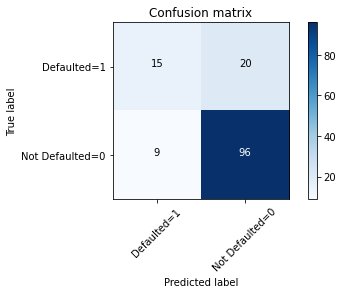

In [70]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defaulted=1','Not Defaulted=0'],normalize= False,  title='Confusion matrix')

## Accuracy of Classifiers

#### Using Jaccard Similarity score

In [99]:
print('KNN Classifier: ', jaccard_Knn)
print('Decision Tree Classifier: ', jaccard_tree)
print('SVM Classifier: ', jaccard_svm)
print('Logistic Regression Classifier: ', jaccard_log)

KNN Classifier:  0.8071428571428572
Decision Tree Classifier:  0.7
SVM Classifier:  0.8
Logistic Regression Classifier:  0.7928571428571428


#### Using f1 score

In [102]:
print('KNN Classifier: ', f1score_Knn)
print('Decision Tree Classifier: ', f1score_tree)
print('SVM Classifier: ', f1_svm)
print('Logistic Regression Classifier: ', f1_log)

KNN Classifier:  0.7792191112252762
Decision Tree Classifier:  0.693712829226848
SVM Classifier:  0.7812499999999999
Logistic Regression Classifier:  0.7787023544750363


In [ ]:
#### Using Log Loss